In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("hearth_disease.csv")

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [7]:
mapping={1:"Male",0:"Female"}
df["sex"] = df["sex"].map(mapping)

In [8]:
mappingCPT={1:"Typical angina",2:"Atypical angina",3:"Non-anginal pain",4:"Asymptomatic"}
df["chest pain type"]=df["chest pain type"].map(mappingCPT)

In [9]:
mappingRCG={0:"Normal",1:"ST-T Wave Abnormality",2:"Left Ventricular Hypertrophy"}
df["resting ecg"]=df["resting ecg"].map(mappingRCG)

In [10]:
mappingEA={0:"No",1:"Yes"}
df["exercise angina"] = df["exercise angina"].map(mappingEA)

In [11]:
mappingSTS={1:"Upsloping",2:"Flat",3:"Downsloping"}
df["ST slope"]=df["ST slope"].map(mappingSTS)

In [12]:
mappingTarget={1:"Heart disease",0:"Normal"}
df["target"] = df["target"].map(mappingTarget)

In [13]:
df.head(20)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,Male,Atypical angina,140,289,0,Normal,172,No,0.0,Upsloping,Normal
1,49,Female,Non-anginal pain,160,180,0,Normal,156,No,1.0,Flat,Heart disease
2,37,Male,Atypical angina,130,283,0,ST-T Wave Abnormality,98,No,0.0,Upsloping,Normal
3,48,Female,Asymptomatic,138,214,0,Normal,108,Yes,1.5,Flat,Heart disease
4,54,Male,Non-anginal pain,150,195,0,Normal,122,No,0.0,Upsloping,Normal
5,39,Male,Non-anginal pain,120,339,0,Normal,170,No,0.0,Upsloping,Normal
6,45,Female,Atypical angina,130,237,0,Normal,170,No,0.0,Upsloping,Normal
7,54,Male,Atypical angina,110,208,0,Normal,142,No,0.0,Upsloping,Normal
8,37,Male,Asymptomatic,140,207,0,Normal,130,Yes,1.5,Flat,Heart disease
9,48,Female,Atypical angina,120,284,0,Normal,120,No,0.0,Upsloping,Normal


In [14]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,Male,Typical angina,110,264,0,Normal,132,No,1.2,Flat,Heart disease
1186,68,Male,Asymptomatic,144,193,1,Normal,141,No,3.4,Flat,Heart disease
1187,57,Male,Asymptomatic,130,131,0,Normal,115,Yes,1.2,Flat,Heart disease
1188,57,Female,Atypical angina,130,236,0,Left Ventricular Hypertrophy,174,No,0.0,Flat,Heart disease
1189,38,Male,Non-anginal pain,138,175,0,Normal,173,No,0.0,Upsloping,Normal


Text(0.5, 1.0, 'Distribution of age')

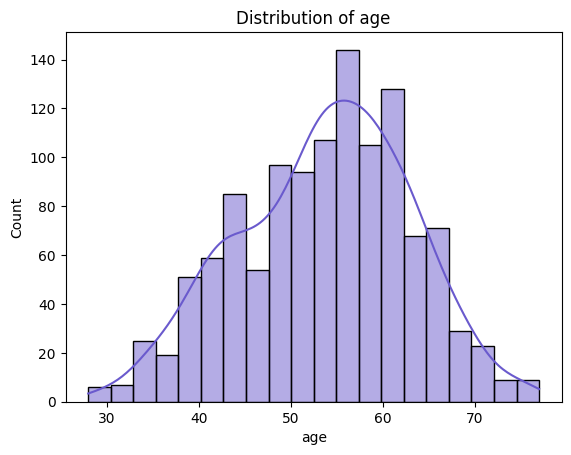

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df,x="age",kde=True,color="slateblue",edgecolor="black")
plt.title("Distribution of age")

Text(0.5, 1.0, 'Distribution of resting blood pressure')

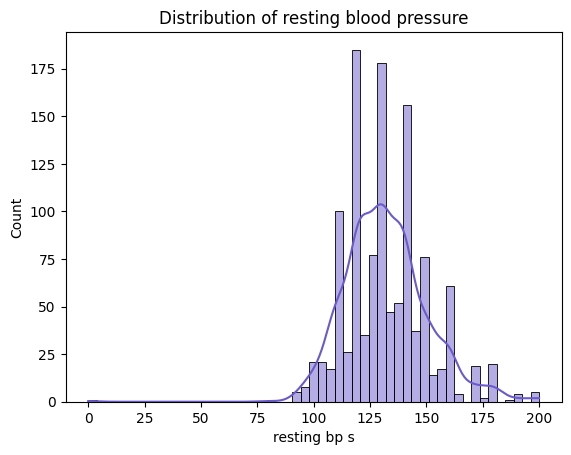

In [16]:
sns.histplot(data=df,x="resting bp s",kde=True,color="slateblue",edgecolor="black")
plt.title("Distribution of resting blood pressure")

Text(0.5, 1.0, 'Distribution of cholesterol')

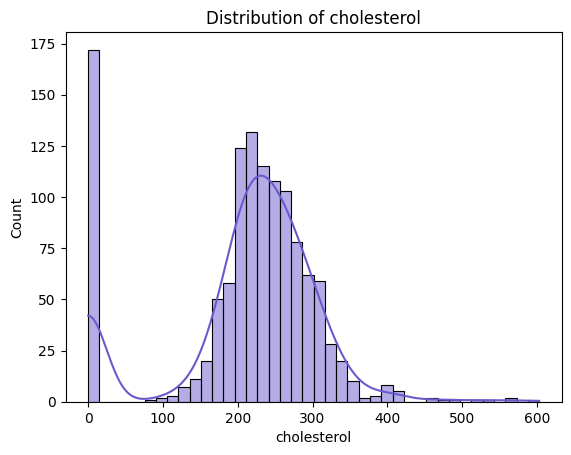

In [17]:
sns.histplot(data=df,x="cholesterol",kde=True,color="slateblue",edgecolor="black")
plt.title("Distribution of cholesterol")

Text(0.5, 1.0, 'Distribution of max heart rate')

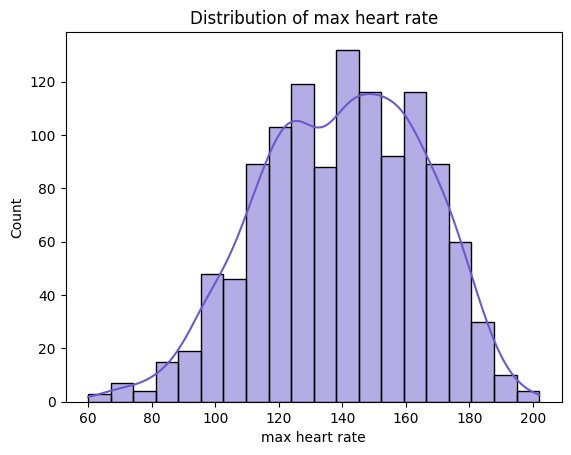

In [18]:
sns.histplot(data=df,x="max heart rate",kde=True,color="slateblue",edgecolor="black")
plt.title("Distribution of max heart rate")

Text(0.5, 1.0, 'Distribution of oldpeak')

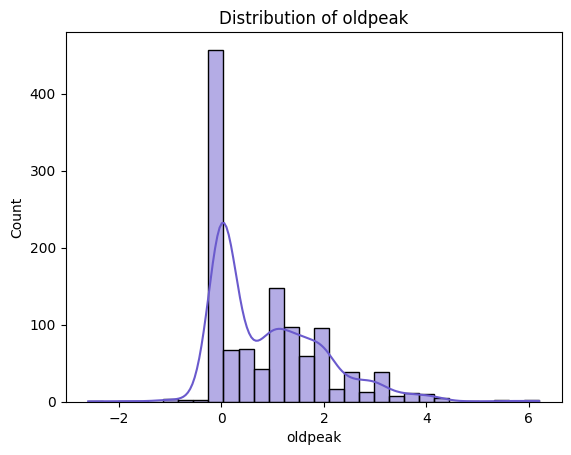

In [19]:
sns.histplot(data=df,x="oldpeak",kde=True,color="slateblue",edgecolor="black")
plt.title("Distribution of oldpeak")

C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_21112\2785389204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sex'],palette=custom_p);


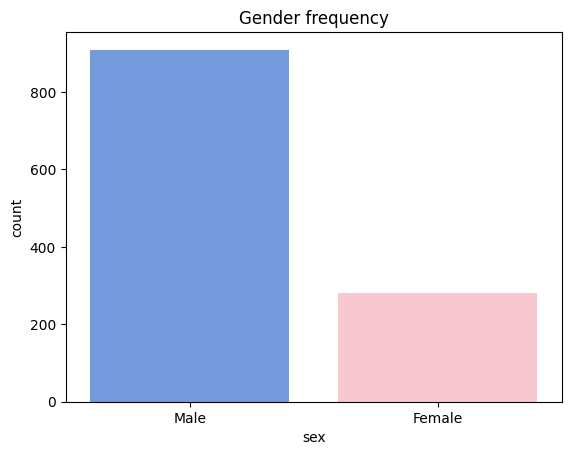

In [20]:
custom_p={'Male' : 'cornflowerblue' , "Female":"pink"}
custom_palette = {'Heart disease': 'red', 'Normal': 'blue'}
sns.countplot(x=df['sex'],palette=custom_p);
plt.title("Gender frequency");

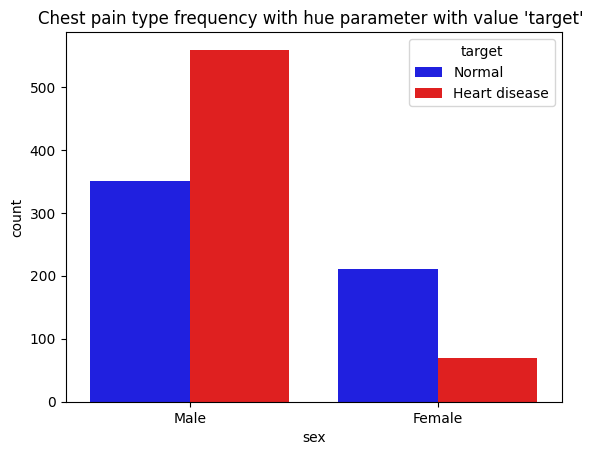

In [21]:
sns.countplot(x=df['sex'],palette=custom_palette,hue=df["target"])
plt.title("Chest pain type frequency with hue parameter with value 'target' ");

C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_21112\404840989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['chest pain type'],palette="Set3")


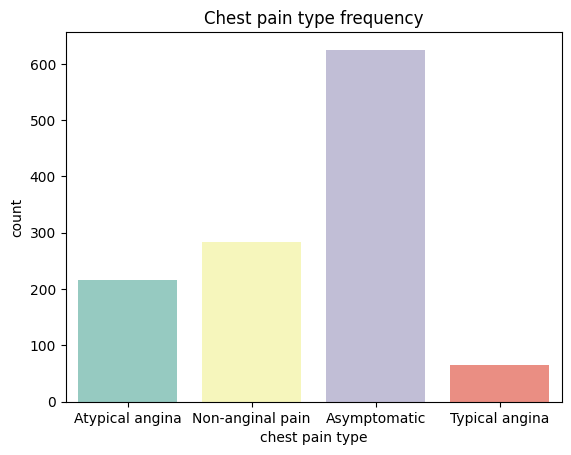

In [22]:
sns.countplot(x=df['chest pain type'],palette="Set3")
plt.title("Chest pain type frequency");

Text(0.5, 1.0, "Chest pain type frequency with hue parameter with value 'target' ")

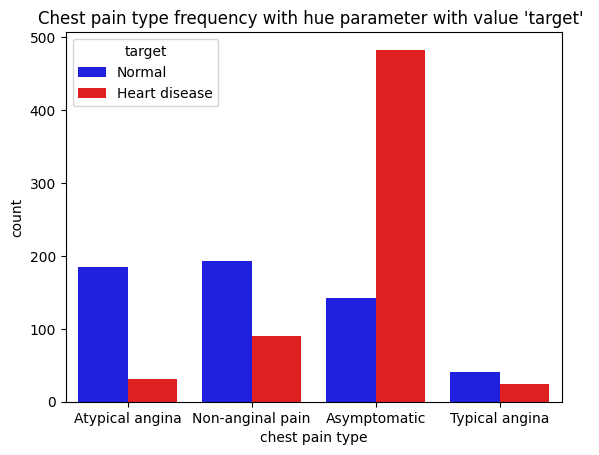

In [23]:
sns.countplot(x=df['chest pain type'],hue=df["target"],palette=custom_palette)
plt.title("Chest pain type frequency with hue parameter with value 'target' ")

Text(0.5, 1.0, "Chest pain type frequency with hue parameter with value 'Sex' ")

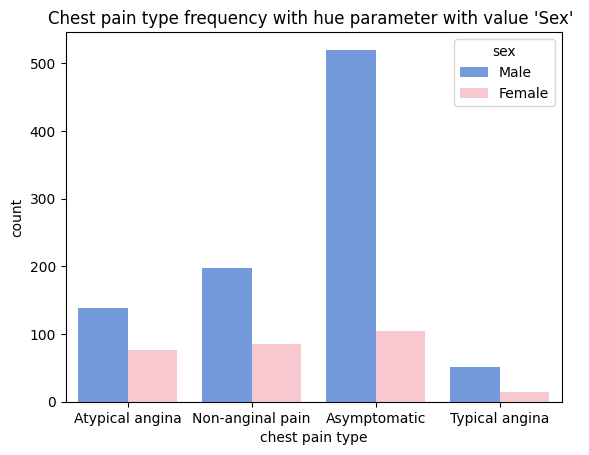

In [24]:
sns.countplot(x=df['chest pain type'],palette=custom_p,hue=df["sex"])
plt.title("Chest pain type frequency with hue parameter with value 'Sex' ")

C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_21112\2409198348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['resting ecg'],palette="Set3")


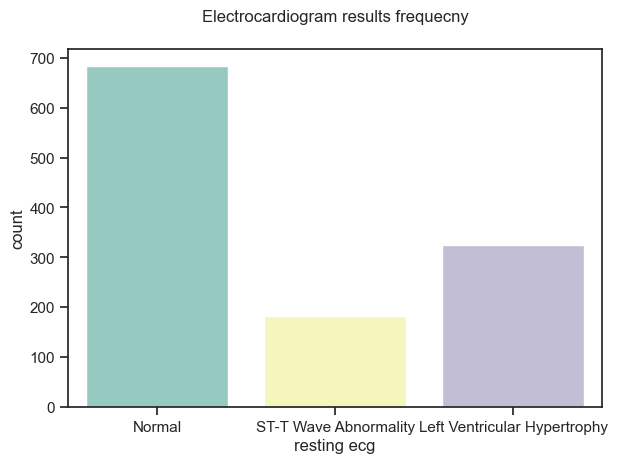

In [25]:
sns.set_theme(style="ticks",rc={'axes.labelpad': 3, 'axes.titlepad': 20})
sns.countplot(x=df['resting ecg'],palette="Set3")
plt.title("Electrocardiogram results frequecny")
plt.tight_layout()

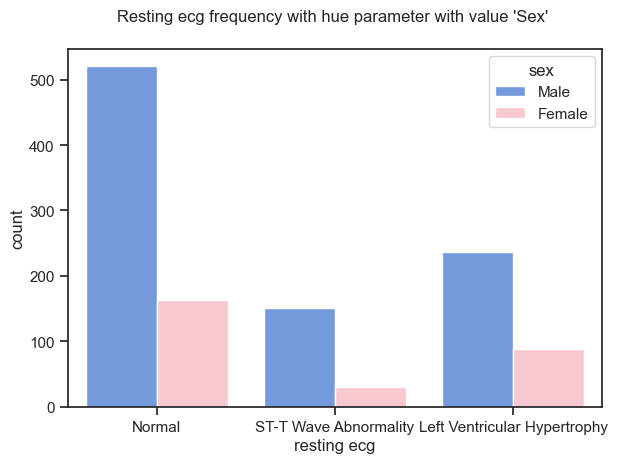

In [26]:
sns.set_theme(style="ticks",rc={'axes.labelpad': 3, 'axes.titlepad': 20})
sns.countplot(x=df['resting ecg'],palette=custom_p,hue=df["sex"])
plt.title("Resting ecg frequency with hue parameter with value 'Sex' ")
plt.tight_layout()

Text(0.5, 1.0, "Resting ecg frequency with hue parameter with value 'target' ")

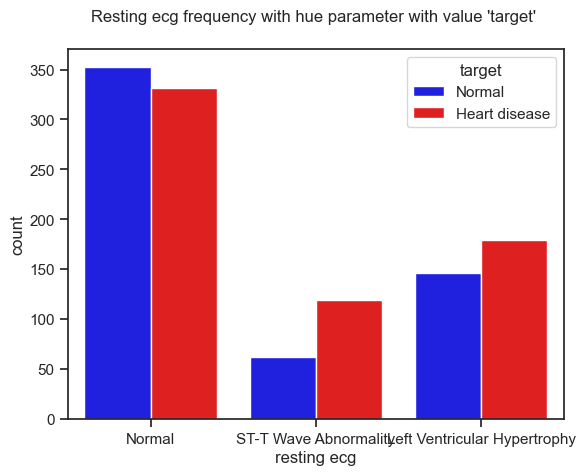

In [27]:
sns.countplot(x=df['resting ecg'],hue=df["target"],palette=custom_palette)

plt.title("Resting ecg frequency with hue parameter with value 'target' ")

C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_21112\1388264021.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['exercise angina'],palette="Set2")


Text(0.5, 1.0, 'Exercise angina frequency')

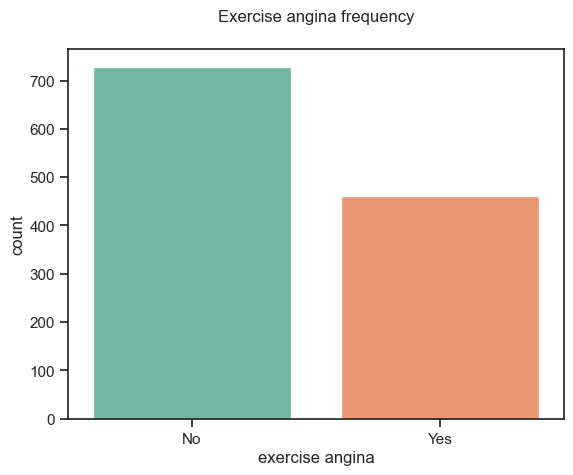

In [28]:
sns.countplot(x=df['exercise angina'],palette="Set2")
plt.title("Exercise angina frequency")


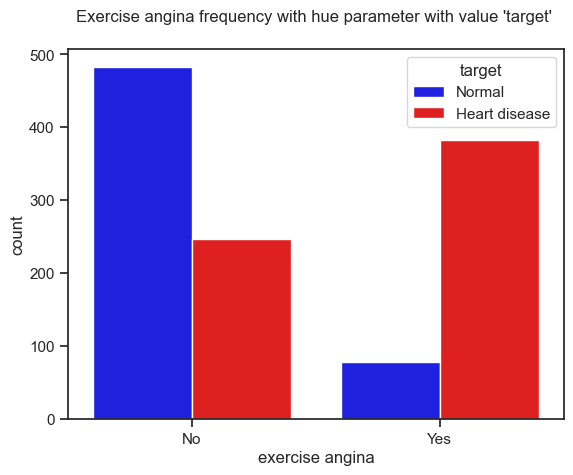

In [29]:

sns.countplot(x=df['exercise angina'],hue=df["target"],palette=custom_palette)

plt.title("Exercise angina frequency with hue parameter with value 'target' ");

Text(0.5, 1.0, 'Exercise angina frequency with hue parameter with value "Sex" ')

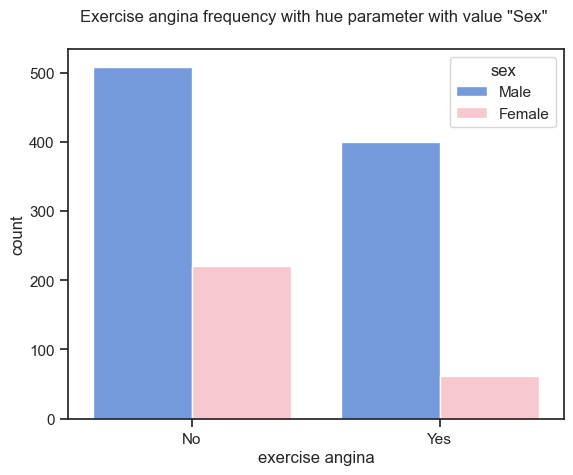

In [30]:
sns.countplot(x=df['exercise angina'],hue=df["sex"],palette=custom_p)
plt.title('Exercise angina frequency with hue parameter with value "Sex" ')

C:\Users\Arda Öztüner\AppData\Local\Temp\ipykernel_21112\3228855888.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ST slope'],palette="Set3")


Text(0.5, 1.0, 'ST Slope frequency')

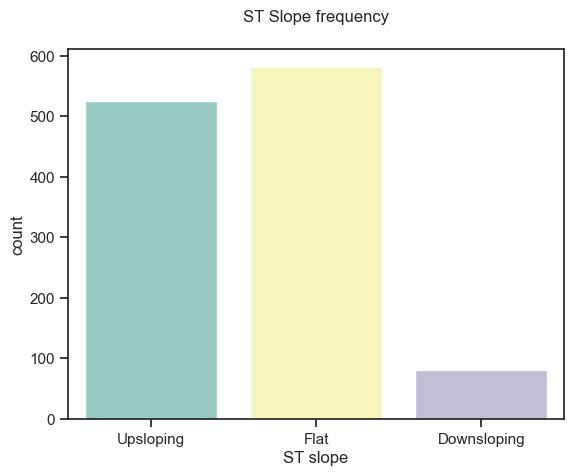

In [31]:
sns.countplot(x=df['ST slope'],palette="Set3")
plt.title("ST Slope frequency")

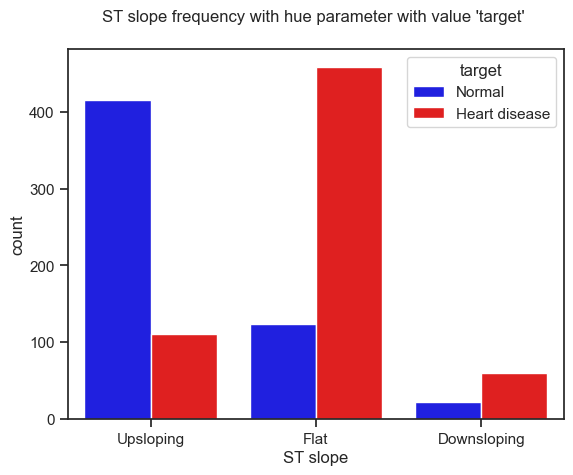

In [32]:
sns.countplot(x=df['ST slope'],hue=df["target"],palette=custom_palette)
plt.title("ST slope frequency with hue parameter with value 'target' ");

Text(0.5, 1.0, 'ST slope frequency with hue parameter with value "Sex" ')

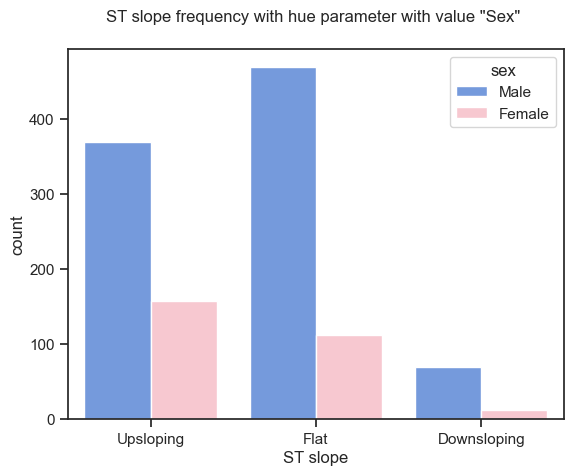

In [33]:


sns.countplot(x=df['ST slope'],hue=df["sex"],palette=custom_p)
plt.title('ST slope frequency with hue parameter with value "Sex" ')

In [35]:
print("2. commit")

2. commit
